In [4]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("Lending_TRAINING_DATA.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7759 entries, 0 to 7758
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   APPLICATION.ID                 7759 non-null   int64  
 1   DSA.ID                         7759 non-null   object 
 2   DEALER.ID                      7759 non-null   int64  
 3   APP.DATE                       7759 non-null   object 
 4   TIME.STAMP                     7759 non-null   object 
 5   APPLICATION.STATUS             7759 non-null   object 
 6   QUEUE.ID                       7759 non-null   object 
 7   CURRENT.STAGE                  7759 non-null   object 
 8   MARITAL.STATUS                 7759 non-null   object 
 9   GENDER                         7759 non-null   object 
 10  AGE                            7759 non-null   int64  
 11  EDUCATION                      7759 non-null   object 
 12  RESIDENCE.TYPE                 7759 non-null   o

In [11]:
col= df.columns
col
null_col=[]
more_null=[]
for i in col:
    
    if(df[i].isnull().sum()>0):
        print(i," ", df[i].isnull().sum())
        
        null_col.append(i)
        if(df[i].isnull().sum()>7000):
            more_null.append(i)
        
print(null_col)   
print("moe than 7000: :",more_null) 

NET.TAKE.HOME.SALARY   7156
PAN.STATUS   1
APPLICATION.SCORE   3
RESIDENTIAL.ADDRESS.SCORE   1624
OFFICE.ADDRESS.SCORE   1623
NAME.SCORE   5372
APPROVED.AMOUNT   4421
ASSET.MAKE   4421
ASSET.CTG   4421
DEDUPE.REF.ID1   7740
CAR.CATEGORY   7753
OWN.HOUSE.TYPE   3956
HOUSE.SURROGATE.DOCUMENT.TYPE   3956
TRADER.YEAR.IN.BUSINESS   7661
TRADER.BUSINESS.PROOF   7661
CREDIT.CARD.NUMBER   7399
CREDIT.CARDS.CATEGORY   7399
['NET.TAKE.HOME.SALARY', 'PAN.STATUS', 'APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE', 'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPROVED.AMOUNT', 'ASSET.MAKE', 'ASSET.CTG', 'DEDUPE.REF.ID1', 'CAR.CATEGORY', 'OWN.HOUSE.TYPE', 'HOUSE.SURROGATE.DOCUMENT.TYPE', 'TRADER.YEAR.IN.BUSINESS', 'TRADER.BUSINESS.PROOF', 'CREDIT.CARD.NUMBER', 'CREDIT.CARDS.CATEGORY']
moe than 7000: : ['NET.TAKE.HOME.SALARY', 'DEDUPE.REF.ID1', 'CAR.CATEGORY', 'TRADER.YEAR.IN.BUSINESS', 'TRADER.BUSINESS.PROOF', 'CREDIT.CARD.NUMBER', 'CREDIT.CARDS.CATEGORY']


In [13]:
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
null_num=[]
for i in numerical:
    
    if(df[i].isnull().sum()>0):
        print(i," ", df[i].isnull().sum())
        
        null_num.append(i)
print(null_num)  

for i in null_num:
    df.loc[df[i]=='',[i] ]= np.NaN
    df[i].fillna(value =df[i].median(),  inplace = True)
    df[i].value_counts(dropna=False)


There are 14 numerical variables
NET.TAKE.HOME.SALARY   7156
RESIDENTIAL.ADDRESS.SCORE   1624
OFFICE.ADDRESS.SCORE   1623
NAME.SCORE   5372
APPROVED.AMOUNT   4421
DEDUPE.REF.ID1   7740
TRADER.YEAR.IN.BUSINESS   7661
CREDIT.CARD.NUMBER   7399
['NET.TAKE.HOME.SALARY', 'RESIDENTIAL.ADDRESS.SCORE', 'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPROVED.AMOUNT', 'DEDUPE.REF.ID1', 'TRADER.YEAR.IN.BUSINESS', 'CREDIT.CARD.NUMBER']


In [14]:
df.loc[df['RESIDENTIAL.ADDRESS.SCORE']=='',['RESIDENTIAL.ADDRESS.SCORE'] ]= np.NaN
df['RESIDENTIAL.ADDRESS.SCORE'].fillna(value =df['RESIDENTIAL.ADDRESS.SCORE'].median(),  inplace = True)
df['RESIDENTIAL.ADDRESS.SCORE'].value_counts(dropna=False)

74.34     1630
0.00      1171
75.00       40
66.67       30
80.00       21
83.33       21
85.71       19
87.50       14
70.00       13
72.73       13
76.92       12
77.78       12
81.82       11
81.25       11
71.43       10
78.38       10
80.65       10
100.00      10
73.33        9
76.98        9
80.77        9
82.61        9
61.54        8
73.68        8
84.38        8
79.17        8
81.40        8
82.08        8
90.70        8
90.91        8
79.79        8
80.67        8
74.83        8
78.95        8
73.53        8
74.81        8
76.19        8
88.89        8
79.86        7
84.62        7
71.88        7
85.00        7
70.63        7
78.57        7
93.08        7
82.14        7
81.58        7
74.58        7
77.50        7
90.84        7
91.67        7
50.00        7
78.63        7
73.94        7
76.00        7
77.27        7
74.10        7
85.19        7
72.22        7
75.47        6
76.03        6
89.47        6
72.09        6
73.65        6
81.36        6
88.03        6
84.17     

In [15]:

df.loc[df['OFFICE.ADDRESS.SCORE']=='',['OFFICE.ADDRESS.SCORE'] ]= np.NaN
df['OFFICE.ADDRESS.SCORE'].fillna(value =df['OFFICE.ADDRESS.SCORE'].median(),  inplace = True)
df['OFFICE.ADDRESS.SCORE'].value_counts(dropna=False)

0.000      2343
58.205     1623
66.670       34
75.000       22
71.430       18
83.330       15
60.000       15
50.000       14
80.000       12
85.710       10
62.500       10
76.470        9
73.680        8
57.140        8
64.000        8
68.750        8
70.000        8
76.920        8
55.560        8
77.780        7
74.580        7
58.540        7
73.330        7
69.230        7
65.220        7
72.730        7
79.170        7
61.540        7
62.040        7
64.760        6
67.500        6
75.890        6
52.380        6
67.590        6
84.620        6
73.640        6
67.860        6
78.260        6
72.220        6
65.000        6
57.020        6
88.890        6
80.950        6
81.820        6
56.060        6
55.170        6
71.130        6
55.000        6
65.380        6
76.000        5
57.690        5
53.280        5
78.870        5
71.760        5
58.330        5
65.060        5
56.250        5
63.640        5
71.720        5
66.940        5
64.290        5
83.190        5
87.500  

In [16]:
df.loc[df['NAME.SCORE']=='',['NAME.SCORE'] ]= np.NaN
df['NAME.SCORE'].fillna(value =df['NAME.SCORE'].median(),  inplace = True)
df['NAME.SCORE'].value_counts(dropna=False)

78.26     5503
76.19      140
80.00      114
73.68       96
82.76       86
81.48       84
85.71       75
70.59       73
83.87       67
66.67       67
84.85       61
86.49       50
87.18       39
88.89       36
90.91       35
87.80       33
61.54       28
92.31       26
94.12       26
50.00       25
94.74       24
93.33       24
85.19       22
88.37       21
95.65       20
68.75       18
57.14       18
84.00       18
89.19       17
64.29       16
58.33       16
82.61       16
87.10       15
75.00       15
62.50       14
54.55       14
60.00       14
95.24       14
88.57       14
72.73       13
71.43       12
89.74       12
86.21       12
91.84       11
96.77       11
63.64       10
90.24       10
87.88       10
91.11       10
89.36       10
69.23       10
89.80        9
65.79        9
60.61        9
96.00        9
62.07        9
67.86        9
53.85        8
90.70        8
68.18        7
63.41        7
100.00       7
70.00        7
80.95        7
56.00        7
70.73        7
60.71     

In [18]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
null_cat=[]
for i in categorical:
    
    if(df[i].isnull().sum()>0):
        print(i," ", df[i].isnull().sum())
        
        null_cat.append(i)
print(null_cat)   

There are 32 categorical variables
PAN.STATUS   1
APPLICATION.SCORE   3
ASSET.MAKE   4421
ASSET.CTG   4421
CAR.CATEGORY   7753
OWN.HOUSE.TYPE   3956
HOUSE.SURROGATE.DOCUMENT.TYPE   3956
TRADER.BUSINESS.PROOF   7661
CREDIT.CARDS.CATEGORY   7399
['PAN.STATUS', 'APPLICATION.SCORE', 'ASSET.MAKE', 'ASSET.CTG', 'CAR.CATEGORY', 'OWN.HOUSE.TYPE', 'HOUSE.SURROGATE.DOCUMENT.TYPE', 'TRADER.BUSINESS.PROOF', 'CREDIT.CARDS.CATEGORY']


In [20]:
df['PAN.STATUS'].value_counts(dropna=False)
df.loc[df['PAN.STATUS']=='',['PAN.STATUS'] ]= np.NaN
df['PAN.STATUS'].fillna('Pan Not Submitted',  inplace = True)
df['PAN.STATUS'].value_counts(dropna=False)

Pan Not Submitted    3332
EXIST                2387
ERROR                1842
NOT_FOUND             198
Name: PAN.STATUS, dtype: int64

In [21]:
df['OWN.HOUSE.TYPE'].value_counts(dropna=False)
df.loc[df['OWN.HOUSE.TYPE']=='',['OWN.HOUSE.TYPE'] ]= np.NaN
df['OWN.HOUSE.TYPE'].fillna('Missing',  inplace = True)
df['OWN.HOUSE.TYPE'].value_counts(dropna=False)

Missing           3956
Parent Owned      1815
Self Owned        1743
Spouse Owned       234
Children Owned      11
Name: OWN.HOUSE.TYPE, dtype: int64

In [22]:
df['HOUSE.SURROGATE.DOCUMENT.TYPE'].value_counts(dropna=False)

df.loc[df['HOUSE.SURROGATE.DOCUMENT.TYPE']=='',['HOUSE.SURROGATE.DOCUMENT.TYPE'] ]= np.NaN
df['HOUSE.SURROGATE.DOCUMENT.TYPE'].fillna('Missing',  inplace = True)
df['HOUSE.SURROGATE.DOCUMENT.TYPE'].value_counts(dropna=False)

Missing                    3956
Utility Bill               3600
Property Tax Bill           162
Index II                     39
Encumbrance Certificate       2
Name: HOUSE.SURROGATE.DOCUMENT.TYPE, dtype: int64

In [23]:
df['APPLICATION.SCORE'].replace('-', np.NaN, inplace=True)
#df['APPLICATION.SCORE'].replace('-', np.NaN, inplace=True)
df['APPLICATION.SCORE'].replace('RENGANATHAN MOHAN ', np.NaN, inplace=True)
df['APPLICATION.SCORE'].unique()
df['APPLICATION.SCORE']=df['APPLICATION.SCORE'].astype('float')
df['APPLICATION.SCORE']

0        69.00
1       108.00
2       143.00
3        60.00
4        62.00
5        92.00
6         3.00
7        13.00
8        74.00
9        13.00
10      104.00
11       13.00
12       35.00
13       13.00
14       68.00
15        8.00
16       47.00
17       13.00
18       13.00
19       13.00
20       53.00
21       61.00
22       91.00
23       75.00
24       42.00
25       50.00
26       86.00
27      101.00
28       13.00
29       13.00
30       88.00
31       13.00
32      114.00
33       58.00
34       83.00
35       90.00
36       13.00
37       33.00
38       13.00
39       13.00
40      134.00
41       13.00
42       13.00
43       58.00
44       33.00
45       54.00
46       13.00
47       13.00
48       13.00
49       17.00
50       13.00
51       13.00
52       21.00
53        6.00
54      100.00
55       60.00
56       13.00
57      115.00
58       73.00
59       44.00
60       13.00
61       13.00
62      114.00
63      112.00
64       13.00
65       -2.00
66       1

In [24]:
df['APPLICATION.SCORE'].fillna(value =df['APPLICATION.SCORE'].median(), inplace=True)

In [25]:
df['CIBIL.SCORE']=df['CIBIL.SCORE'].replace('000-1', np.NaN)
df['CIBIL.SCORE']=df['CIBIL.SCORE'].replace('-', np.NaN)
df['CIBIL.SCORE']=df['CIBIL.SCORE'].astype('float')
df['CIBIL.SCORE']

0       734.0
1       840.0
2       863.0
3         NaN
4       797.0
5       770.0
6         0.0
7         NaN
8       786.0
9         NaN
10      740.0
11        NaN
12      774.0
13        NaN
14      779.0
15        0.0
16      784.0
17        NaN
18        NaN
19        NaN
20      740.0
21      785.0
22      782.0
23      781.0
24      837.0
25      772.0
26      784.0
27      774.0
28      723.0
29        NaN
30      786.0
31        NaN
32      812.0
33      806.0
34      645.0
35      672.0
36        NaN
37        NaN
38        NaN
39        NaN
40      800.0
41        NaN
42        NaN
43      737.0
44        NaN
45      705.0
46        NaN
47        NaN
48        NaN
49      740.0
50        NaN
51        NaN
52      509.0
53      625.0
54      811.0
55      778.0
56        NaN
57      789.0
58      778.0
59      760.0
60        NaN
61        NaN
62      814.0
63      806.0
64        NaN
65        0.0
66        NaN
67      804.0
68      753.0
69        NaN
70      730.0
71    

In [27]:
df.loc[df['CIBIL.SCORE']=='',['CIBIL.SCORE'] ]= np.NaN
df['CIBIL.SCORE'].fillna(value =df['CIBIL.SCORE'].median(),  inplace = True)
df['CIBIL.SCORE'].value_counts(dropna=False)

767.0    2977
0.0       444
781.0      95
774.0      89
776.0      88
779.0      75
789.0      74
778.0      70
783.0      67
804.0      67
772.0      66
782.0      59
769.0      57
765.0      53
771.0      51
773.0      50
802.0      50
817.0      50
787.0      49
763.0      47
806.0      47
791.0      44
784.0      42
768.0      42
796.0      39
800.0      36
793.0      35
819.0      34
788.0      34
798.0      33
797.0      33
815.0      32
792.0      31
777.0      31
813.0      31
811.0      30
808.0      30
821.0      30
760.0      30
799.0      30
770.0      29
812.0      29
785.0      29
775.0      28
766.0      27
795.0      27
786.0      27
825.0      26
823.0      26
780.0      26
794.0      25
727.0      25
762.0      25
758.0      25
737.0      25
740.0      25
755.0      24
742.0      23
756.0      23
810.0      21
801.0      21
744.0      21
739.0      20
750.0      20
747.0      20
741.0      19
733.0      19
745.0      19
790.0      19
731.0      19
752.0      19
820.0 

In [28]:
df.isnull().any()

APPLICATION.ID                   False
DSA.ID                           False
DEALER.ID                        False
APP.DATE                         False
TIME.STAMP                       False
APPLICATION.STATUS               False
QUEUE.ID                         False
CURRENT.STAGE                    False
MARITAL.STATUS                   False
GENDER                           False
AGE                              False
EDUCATION                        False
RESIDENCE.TYPE                   False
CITY                             False
STATE                            False
ZIP.CODE                         False
EMPLOY.CONSTITUTION              False
NET.TAKE.HOME.SALARY             False
PAN.STATUS                       False
CIBIL.SCORE                      False
APPLICATION.SCORE                False
RESIDENTIAL.ADDRESS.SCORE        False
OFFICE.ADDRESS.SCORE             False
NAME.SCORE                       False
APPROVED.AMOUNT                  False
ASSET.MAKE               

In [30]:
df = df.drop(['CAR.CATEGORY', 'TRADER.YEAR.IN.BUSINESS',
               'CREDIT.CARD.NUMBER', 'ASSET.MAKE',
              'ASSET.CTG','APPROVED.AMOUNT'],axis =1)
df.shape

(7759, 40)

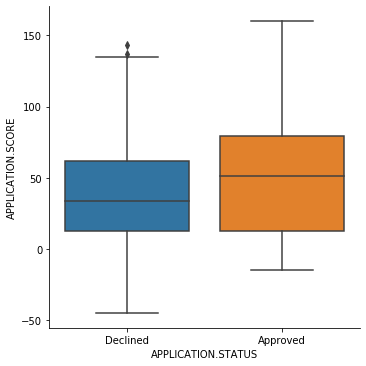

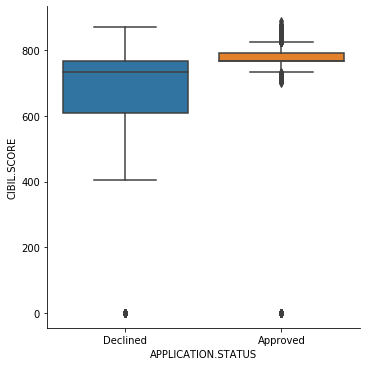

In [44]:

sns.catplot(x="APPLICATION.STATUS", y="APPLICATION.SCORE", kind="box", data=df)


sns.catplot(x="APPLICATION.STATUS", y="CIBIL.SCORE", kind="box", data=df)

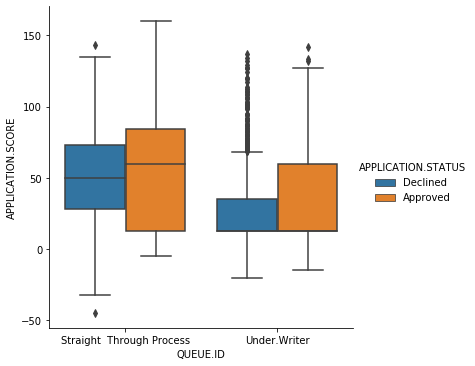

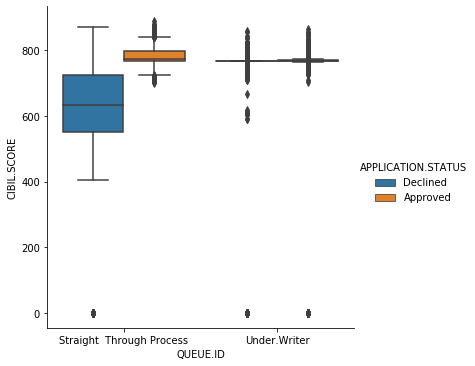

In [45]:
sns.catplot(x="QUEUE.ID", y="APPLICATION.SCORE", hue="APPLICATION.STATUS", kind="box", data=df)
sns.catplot(x="QUEUE.ID", y="CIBIL.SCORE", hue="APPLICATION.STATUS", kind="box", data=df)

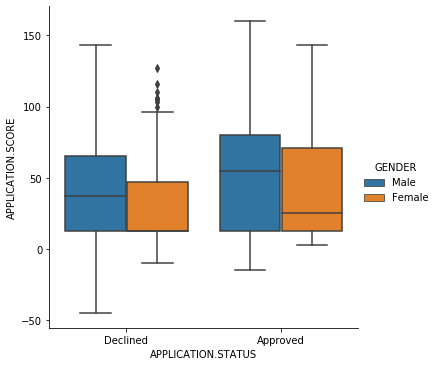

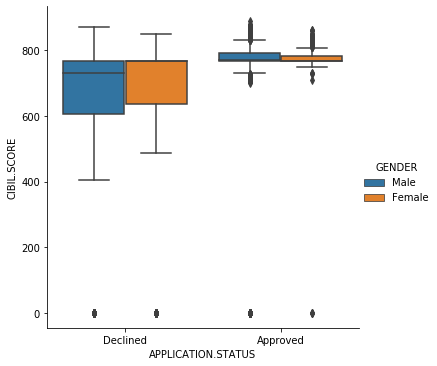

In [47]:
sns.catplot(x="APPLICATION.STATUS", y="APPLICATION.SCORE", hue="GENDER", kind="box", data=df)
sns.catplot(x="APPLICATION.STATUS", y="CIBIL.SCORE", hue="GENDER", kind="box", data=df)

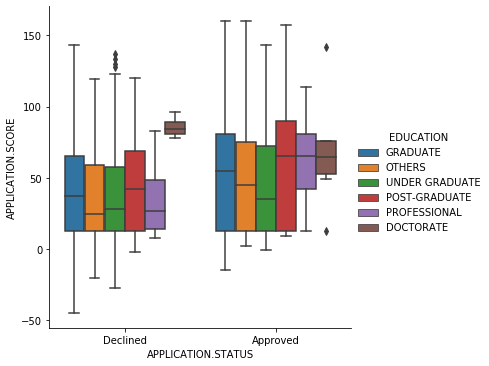

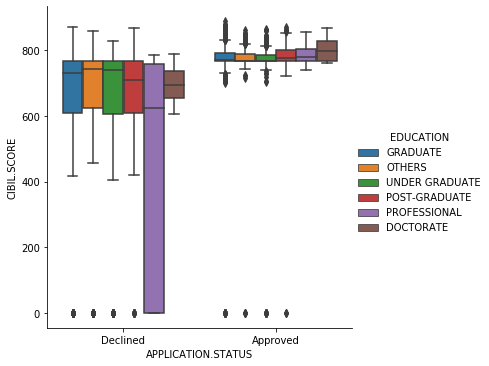

In [48]:
sns.catplot(x="APPLICATION.STATUS", y="APPLICATION.SCORE", hue="EDUCATION", kind="box", data=df)
sns.catplot(x="APPLICATION.STATUS", y="CIBIL.SCORE", hue="EDUCATION", kind="box", data=df)

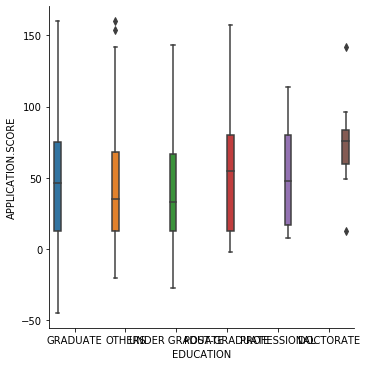

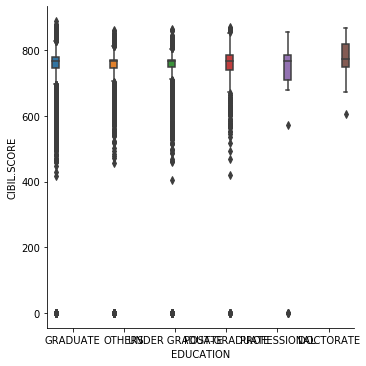

In [49]:
sns.catplot(x="EDUCATION", y="APPLICATION.SCORE", hue="EDUCATION", kind="box", data=df)
sns.catplot(x="EDUCATION", y="CIBIL.SCORE", hue="EDUCATION", kind="box", data=df)

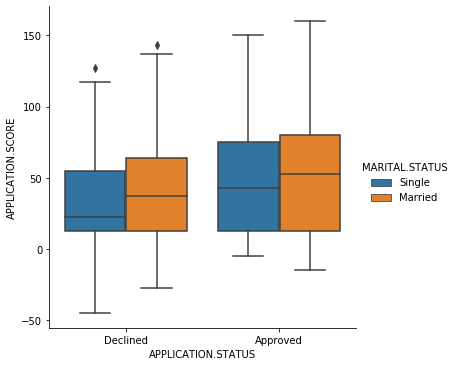

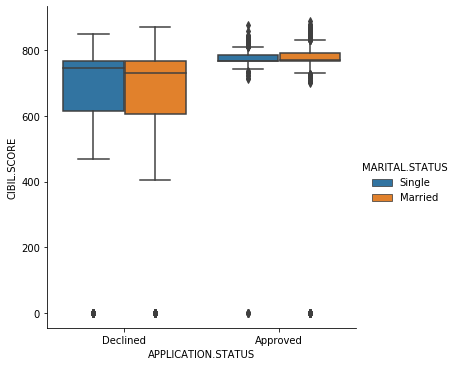

In [50]:
sns.catplot(x="APPLICATION.STATUS", y="APPLICATION.SCORE", hue="MARITAL.STATUS", kind="box", data=df)
sns.catplot(x="APPLICATION.STATUS", y="CIBIL.SCORE", hue="MARITAL.STATUS", kind="box", data=df)

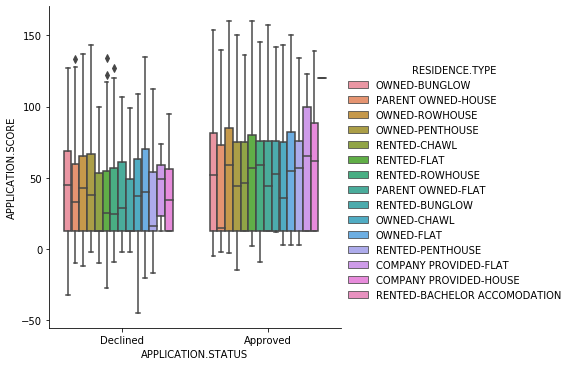

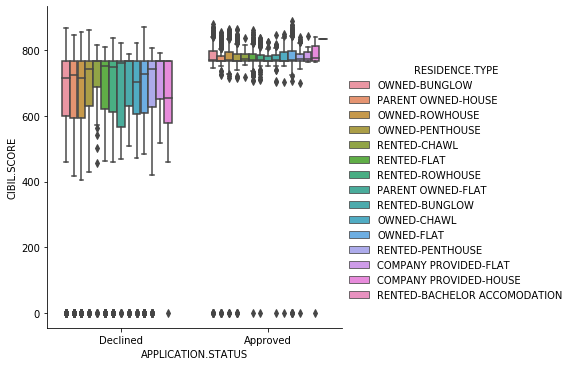

In [51]:


sns.catplot(x="APPLICATION.STATUS", y="APPLICATION.SCORE", hue="RESIDENCE.TYPE", kind="box", data=df)
sns.catplot(x="APPLICATION.STATUS", y="CIBIL.SCORE", hue="RESIDENCE.TYPE", kind="box", data=df)

In [ ]:
APPLICATION.ID                 7759 non-null   int64  
 1   DSA.ID                         7759 non-null   object 
 2   DEALER.ID                      7759 non-null   int64  
 3   APP.DATE                       7759 non-null   object 
 4   TIME.STAMP                     7759 non-null   object 
 5   APPLICATION.STATUS             7759 non-null   object 
 6   QUEUE.ID                       7759 non-null   object 
 7   CURRENT.STAGE                  7759 non-null   object 
 8   MARITAL.STATUS                 7759 non-null   object 
 9   GENDER                         7759 non-null   object 
 10  AGE                            7759 non-null   int64  
 11  EDUCATION                      7759 non-null   object 
 12  RESIDENCE.TYPE                 7759 non-null   object 
 13  CITY                           7759 non-null   object 
 14  STATE                          7759 non-null   object 
 15  ZIP.CODE                       7759 non-null   int64  
 16  EMPLOY.CONSTITUTION            7759 non-null   object 
 17  NET.TAKE.HOME.SALARY           603 non-null    float64
 18  PAN.STATUS                     7758 non-null   object 
 19  CIBIL.SCORE                    7759 non-null   object 
 20  APPLICATION.SCORE              7756 non-null   object 
 21  RESIDENTIAL.ADDRESS.SCORE      6135 non-null   float64
 22  OFFICE.ADDRESS.SCORE           6136 non-null   float64
 23  NAME.SCORE                     2387 non-null   float64
 24  APPROVED.AMOUNT                3338 non-null   float64
 25  ASSET.MAKE                     3338 non-null   object 
 26  ASSET.CTG                      3338 non-null   object 
 27  APPLIED.AMOUNT                 7759 non-null   int64  
 28  LOAN.TENOR                     7759 non-null   int64  
 29  LOAN.TYPE                      7759 non-null   object 
 30  DEDUPE.REF.ID1                 19 non-null     float64
 31  CAR.CATEGORY                   6 non-null      object 
 32  OWN.HOUSE.TYPE                 3803 non-null   object 
 33  HOUSE.SURROGATE.DOCUMENT.TYPE  3803 non-null   object 
 34  TRADER.YEAR.IN.BUSINESS        98 non-null     float64
 35  TRADER.BUSINESS.PROOF          98 non-null     object 
 36  CREDIT.CARD.NUMBER             360 non-null    float64
 37  CREDIT.CARDS.CATEGORY          360 non-null    object 
 38  PRIMARY.ASSET.CTG              7759 non-null   object 
 39  PRIMARY.ASSET.MAKE             7759 non-null   object 
 40  PRIMARY.ASSET.MODELNO          7759 non-null   object 
 41  VOTER_ID                       7759 non-null   object 
 42  DRIVING_LICENSE                7759 non-null   object 
 43  AADHAAR                        7759 non-null   object 
 44  PAN                            7759 non-null   object 
 45  BANK_PASSBOOK                  7759 non-null   object 

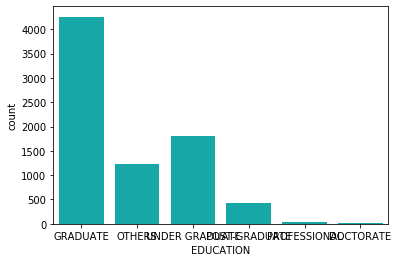

In [52]:
sns.countplot(x="EDUCATION", data=df, color="c")

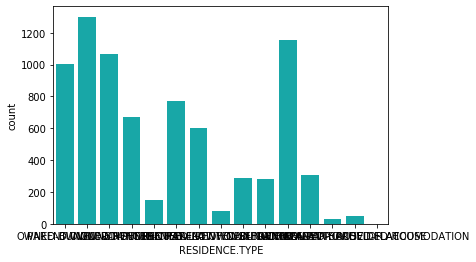

In [53]:
sns.countplot(x="RESIDENCE.TYPE", data=df, color="c")

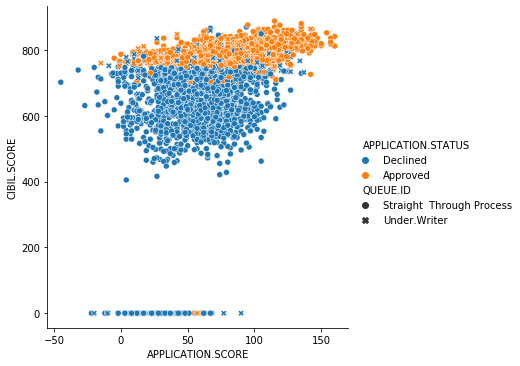

In [54]:
sns.relplot(x="APPLICATION.SCORE", y="CIBIL.SCORE", hue="APPLICATION.STATUS", style="QUEUE.ID",
            data=df);


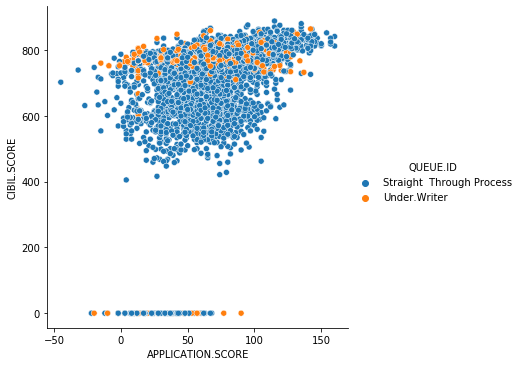

In [57]:
sns.relplot(x="APPLICATION.SCORE", y="CIBIL.SCORE", hue="QUEUE.ID",
            data=df);


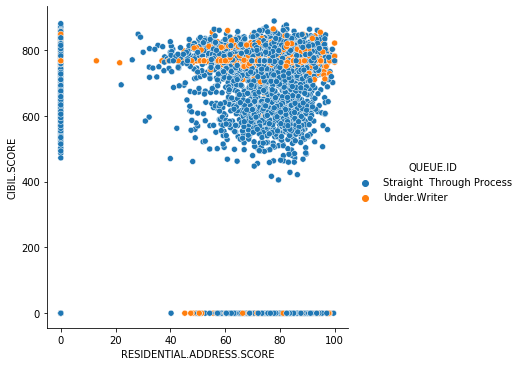

In [61]:
sns.relplot(x="RESIDENTIAL.ADDRESS.SCORE", y="CIBIL.SCORE", hue="QUEUE.ID",
            data=df);

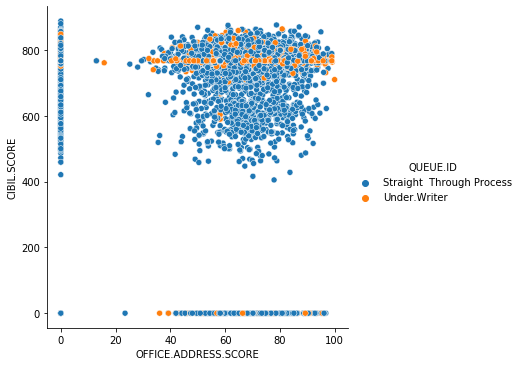

In [63]:
sns.relplot(x="OFFICE.ADDRESS.SCORE", y="CIBIL.SCORE", hue="QUEUE.ID", 
            data=df);

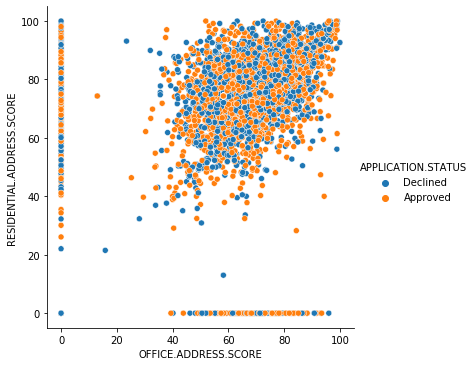

In [67]:
sns.relplot(x="OFFICE.ADDRESS.SCORE", y="RESIDENTIAL.ADDRESS.SCORE", hue='APPLICATION.STATUS',
            data=df);

In [68]:
df_STP=df[df['QUEUE.ID']=='Straight  Through Process']

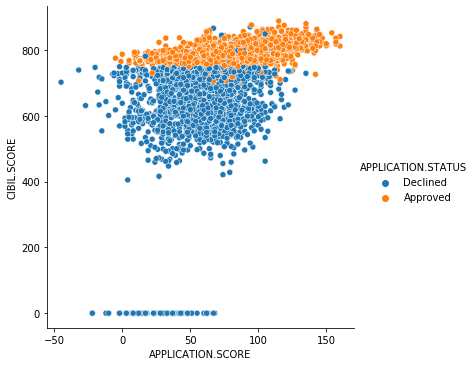

In [70]:
sns.relplot(x="APPLICATION.SCORE", y="CIBIL.SCORE", hue='APPLICATION.STATUS',
            data=df_STP);


In [71]:
df_STP.columns

Index(['APPLICATION.ID', 'DSA.ID', 'DEALER.ID', 'APP.DATE', 'TIME.STAMP',
       'APPLICATION.STATUS', 'QUEUE.ID', 'CURRENT.STAGE', 'MARITAL.STATUS',
       'GENDER', 'AGE', 'EDUCATION', 'RESIDENCE.TYPE', 'CITY', 'STATE',
       'ZIP.CODE', 'EMPLOY.CONSTITUTION', 'NET.TAKE.HOME.SALARY', 'PAN.STATUS',
       'CIBIL.SCORE', 'APPLICATION.SCORE', 'RESIDENTIAL.ADDRESS.SCORE',
       'OFFICE.ADDRESS.SCORE', 'NAME.SCORE', 'APPLIED.AMOUNT', 'LOAN.TENOR',
       'LOAN.TYPE', 'DEDUPE.REF.ID1', 'OWN.HOUSE.TYPE',
       'HOUSE.SURROGATE.DOCUMENT.TYPE', 'TRADER.BUSINESS.PROOF',
       'CREDIT.CARDS.CATEGORY', 'PRIMARY.ASSET.CTG', 'PRIMARY.ASSET.MAKE',
       'PRIMARY.ASSET.MODELNO', 'VOTER_ID', 'DRIVING_LICENSE', 'AADHAAR',
       'PAN', 'BANK_PASSBOOK'],
      dtype='object')

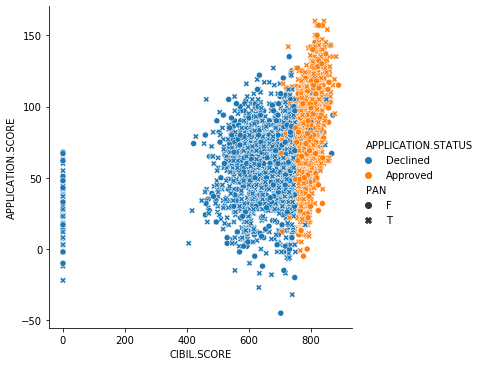

In [74]:
sns.relplot(x="CIBIL.SCORE", y="APPLICATION.SCORE", hue='APPLICATION.STATUS',style="PAN",
            data=df_STP);

In [82]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved') & (df_STP['VOTER_ID']=='F') & (df_STP['DRIVING_LICENSE']=='F')
      & (df_STP['AADHAAR'] =='F') & (df_STP['BANK_PASSBOOK']=='F') & (df_STP['PAN']=='F') ]

APPLICATION.ID   DSA.ID  DEALER.ID    APP.DATE TIME.STAMP  \
989      26692000347  BM66727      26692  2017-02-27   20:57:44   
2157     27901000045  AV50438      27901  2017-02-26   20:20:57   
2282     26692000346  BM66727      26692  2017-02-26   19:33:51   
3181     25220000295  KT27942      25220  2017-02-26   12:10:40   

     APPLICATION.STATUS                   QUEUE.ID CURRENT.STAGE  \
989            Approved  Straight  Through Process          APRV   
2157           Approved  Straight  Through Process       INV_GNR   
2282           Approved  Straight  Through Process          APRV   
3181           Approved  Straight  Through Process       INV_GNR   

     MARITAL.STATUS  GENDER  AGE EDUCATION    RESIDENCE.TYPE        CITY  \
989         Married    Male   27  GRADUATE    OWNED-ROWHOUSE    KOLKATTA   
2157         Single    Male   25  GRADUATE  RENTED-PENTHOUSE  GUTTAHALLI   
2282        Married  Female   51  GRADUATE    OWNED-ROWHOUSE    KOLKATTA   
3181        Married  Female   29    OTHERS     OWNED-BUNGLOW      TRICHY   

            STATE  ZIP.CODE EMPLOY.CONSTITUTION  NET.TAKE.HOME.SALARY  \
989   WEST BENGAL    700078            SALARIED               20000.0   
2157    KARNATAKA    560003            SALARIED               20000.0   
2282  WEST BENGAL    700094       SELF-EMPLOYED               20000.0   
3181   TAMIL NADU    620002       SELF-EMPLOYED               20000.0   

             PAN.STATUS  CIBIL.SCORE  APPLICATION.SCORE  \
989   Pan Not Submitted        773.0               69.0   
2157  Pan Not Submitted        776.0               84.0   
2282  Pan Not Submitted        760.0              105.0   
3181  Pan Not Submitted        820.0              103.0   

      RESIDENTIAL.ADDRESS.SCORE  OFFICE.ADDRESS.SCORE  NAME.SCORE  \
989                       71.79                 72.65       78.26   
2157                      80.14                 46.22       78.26   
2282                      79.21                 72.45       78.26   
3181                      57.48                 51.72       78.26   

      APPLIED.AMOUNT  LOAN.TENOR          LOAN.TYPE  DEDUPE.REF.ID1  \
989            30000           8  Consumer Durables    2.601900e+10   
2157           18000          18  Consumer Durables    2.601900e+10   
2282           33000           8  Consumer Durables    2.601900e+10   
3181           50000          12  Consumer Durables    2.601900e+10   

     OWN.HOUSE.TYPE HOUSE.SURROGATE.DOCUMENT.TYPE TRADER.BUSINESS.PROOF  \
989      Self Owned                  Utility Bill                   NaN   
2157        Missing                       Missing                   NaN   
2282     Self Owned                  Utility Bill                   NaN   
3181     Self Owned                  Utility Bill                   NaN   

      CREDIT.CARDS.CATEGORY PRIMARY.ASSET.CTG PRIMARY.ASSET.MAKE  \
989                     NaN   AIR CONDITIONER          PANASONIC   
2157  Gold/PlatinumCategory      HOME THEATRE            SONYNEW   
2282                    NaN   AIR CONDITIONER            SAMSUNG   
3181                    NaN       REF-FF HOME            SAMSUNG   

     PRIMARY.ASSET.MODELNO VOTER_ID DRIVING_LICENSE AADHAAR PAN BANK_PASSBOOK  
989       CS/CU-YC18RKY3-1        F               F       F   F             F  
2157       HT-RT3//M   E12        F               F       F   F             F  
2282        AR12MV3HETSNNA        F               F       F   F             F  
3181        RT30K3723S8/HL        F               F       F   F             F

In [83]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved') & (df_STP['VOTER_ID']=='F') & (df_STP['DRIVING_LICENSE']=='F')
      & (df_STP['AADHAAR'] =='F') & (df_STP['BANK_PASSBOOK']=='F') & (df_STP['PAN']=='F') ]

APPLICATION.ID   DSA.ID  DEALER.ID    APP.DATE TIME.STAMP  \
1        25556001005  RD02622      25556  2017-02-28   22:05:51   
2        27220000249  SK02345      27220  2017-02-28   21:58:34   
4        26189000138  JB02005      26189  2017-02-28   21:52:33   
11       26746000113  MP24084      26746  2017-02-28   21:38:29   
12       26024000597  AA36752      26024  2017-02-28   21:34:18   
14       25561000875  AT12212      25561  2017-02-28   21:31:24   
16       26043000243  RM54391      26043  2017-02-28   21:30:00   
17       28323000022  ES55246      28323  2017-02-28   21:27:26   
21       25062002042  LB90269      25062  2017-02-28   21:17:29   
22       28241000062  MC08595      28241  2017-02-28   21:17:17   
23       25253000560  SS48028      25253  2017-02-28   21:16:21   
24       25561000874  AT12212      25561  2017-02-28   21:16:19   
26       28365000012  KP77551      28365  2017-02-28   21:12:57   
27       25470000280  SG66121      25470  2017-02-28   21:12:26   
29       27791000039  GS17495      27791  2017-02-28   21:11:25   
30       28234000011  VK50931      28234  2017-02-28   21:09:34   
31       26112000119  AP25235      26112  2017-02-28   21:09:04   
33       28775000002  DP29428      28775  2017-02-28   21:07:38   
38       26027000474  SC81994      26027  2017-02-28   21:05:03   
40       25469000493  BS95393      25469  2017-02-28   21:02:08   
41       27068000178  DN30900      27068  2017-02-28   20:58:56   
47       28479000012  JP01846      28479  2017-02-28   20:52:54   
49       26040000407  SL39173      26040  2017-02-28   20:51:58   
54       26429000107  UG62240      26429  2017-02-28   20:49:13   
55       26044000234  PM13011      26044  2017-02-28   20:48:37   
57       27245000052  MK92016      27245  2017-02-28   20:47:39   
58       26021000547  RT24634      26021  2017-02-28   20:45:33   
60       25840000297   D08219      25840  2017-02-28   20:43:43   
61       25688000151  RP65251      25688  2017-02-28   20:42:38   
64       25561000873  AT12212      25561  2017-02-28   20:40:11   
66       26033000298  SK70341      26033  2017-02-28   20:39:49   
67       25543000506  GN25316      25543  2017-02-28   20:39:40   
69       25696000162  SJ88984      25696  2017-02-28   20:38:26   
73       26058000239  BS74330      26058  2017-02-28   20:36:35   
75       26532000213  AK22774      26532  2017-02-28   20:36:18   
77       25150001260  KM99969      25150  2017-02-28   20:34:40   
79       27050000042  RC11848      27050  2017-02-28   20:33:02   
80       25882000006  VK44034      25882  2017-02-28   20:32:31   
88       26688000015  DM84507      26688  2017-02-28   20:24:30   
89       27551000135  VM81969      27551  2017-02-28   20:23:49   
98       26564000076  GL78881      26564  2017-02-28   20:18:40   
101      25440000405  AI20675      25440  2017-02-28   20:14:04   
102      26451000214  CB60737      26451  2017-02-28   20:13:05   
109      27772000222  PV31200      27772  2017-02-28   20:10:50   
110      26563000964  AN31832      26563  2017-02-28   20:10:06   
111      27837000058  UD34612      27837  2017-02-28   20:09:38   
115      25369000082  YV66772      25369  2017-02-28   20:05:47   
117      26392000371  SP97770      26392  2017-02-28   20:04:23   
120      26202000145  PD86214      26202  2017-02-28   20:03:52   
121      27291000062  RP91518      27291  2017-02-28   20:02:48   
122      28418000019  RS65356      28418  2017-02-28   20:02:14   
124      25559000587  AT76223      25559  2017-02-28   20:02:03   
130      26035000206  MP75543      26035  2017-02-28   19:59:00   
136      25150001259  KM99969      25150  2017-02-28   19:57:37   
137      28481000004  VK50931      28481  2017-02-28   19:57:34   
138      25392000446  SS72884      25392  2017-02-28   19:57:07   
141      26126000148  AC41155      26126  2017-02-28   19:55:59   
142      25439000235  AM33670      25439  2017-02-28   19:55:21   
145      25381000095  KV83841      25381  2017-02-28 

In [88]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved') & (df_STP['VOTER_ID']=='F') & (df_STP['DRIVING_LICENSE']=='F')
      & (df_STP['AADHAAR'] =='F') & (df_STP['BANK_PASSBOOK']=='F') & (df_STP['PAN']=='F') ].shape

(4, 40)

In [87]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved')].shape

(3454, 40)

In [90]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved') & (df_STP['VOTER_ID']=='F') & (df_STP['DRIVING_LICENSE']=='F')
      & (df_STP['AADHAAR'] =='F') & (df_STP['PAN']=='F') ].shape

(4, 40)

In [91]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved') & (df_STP['VOTER_ID']=='T') & (df_STP['DRIVING_LICENSE']=='F')
      & (df_STP['AADHAAR'] =='F') & (df_STP['PAN']=='F') ].shape

(73, 40)

In [95]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved') & (df_STP['VOTER_ID']=='F') & (df_STP['DRIVING_LICENSE']=='T')
      & (df_STP['AADHAAR'] =='F') & (df_STP['PAN']=='F') ].shape

(146, 40)

In [96]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved') & (df_STP['VOTER_ID']=='F') & (df_STP['DRIVING_LICENSE']=='F')
      & (df_STP['AADHAAR'] =='F') & (df_STP['PAN']=='T') ].shape

(640, 40)

In [99]:
df_STP[(df_STP['APPLICATION.STATUS']=='Approved') & (df_STP['VOTER_ID']=='F') & (df_STP['DRIVING_LICENSE']=='F')
      & (df_STP['AADHAAR'] =='T') & (df_STP['PAN']=='F') ].shape

(1027, 40)

In [102]:
df_STP[(df_STP['CIBIL.SCORE']>=705) & 
       
     (  (df_STP['VOTER_ID']=='T') | (df_STP['DRIVING_LICENSE']=='T')
      | (df_STP['AADHAAR'] =='T') | (df_STP['PAN']=='T') )].shape

(4045, 40)

In [106]:
x = df_STP.drop(['APPLICATION.STATUS'],axis=1)
y =df_STP['APPLICATION.STATUS']

In [104]:
from sklearn.datasets import load_iris
>>> from sklearn import tree

In [107]:
clf = tree.DecisionTreeClassifier(random_state=0)

clf = clf.fit(x, y)
tree.plot_tree(clf)


ValueError: could not convert string to float: 'JB02005'